<a href="https://colab.research.google.com/github/Eliasamuneke/Quickstart_lab/blob/main/BACH_CHORALES_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importng the necessary library

In [48]:
import pandas as pd                                                             # Importing the pandas library module for reading the dataset
import numpy as np                                                              # Importing the numpy module for array manipulation
import seaborn as sns                                                           # Importing seaborn module for graph visualization
import matplotlib.pyplot as plt                                                 # Importing matplotlib module for graph visualization
from sklearn.model_selection import train_test_split                            # Importing the train_test_split method for data division
from sklearn.naive_bayes import GaussianNB                                      # Importing the GaussianNB module for model classifier
from sklearn.ensemble import RandomForestClassifier                             # Importing the RandomForestClassifier module for model classifier
from sklearn.linear_model import LogisticRegression                             # Importing the LogisticRegression method for model builder
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold,GridSearchCV # Improting module for checking the classifier
from sklearn.preprocessing import LabelEncoder                                  # Importing the labelencoder method for labeling the data
from sklearn.metrics import roc_auc_score, log_loss                             # Importing the log_loss module for checking the loss 
from sklearn.metrics import classification_report, confusion_matrix             # Importing the confusion matrix method
from sklearn.neighbors import KNeighborsClassifier                              # Importing the KNN classifier module

### Downlaoding the dataset

In [2]:
!wget https://raw.githubusercontent.com/zacharski/ml-class/master/data/bach.zip       # Downloading the dataset
!unzip bach.zip

--2022-11-20 16:51:20--  https://raw.githubusercontent.com/zacharski/ml-class/master/data/bach.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41761 (41K) [application/zip]
Saving to: ‘bach.zip’

bach.zip            100%[===================>]  40.78K  --.-KB/s    in 0.004s  

2022-11-20 16:51:21 (10.8 MB/s) - ‘bach.zip’ saved [41761/41761]

Archive:  bach.zip
  inflating: bach.csv                


### Reading the dataset

In [16]:
data = pd.read_csv('bach.csv')                             # Reading the dataset using the read_csv method by pandas
data

,choral_ID,event_number,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,bass,meter,chord_label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,015505b_,105,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4,G_m
5661,015505b_,106,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3,G_m
5662,015505b_,107,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5,C_M
5663,015505b_,108,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C,3,C_M


### Data Preprocessing

In [17]:
data = data.drop(['choral_ID','event_number','bass','meter'], axis =1)     # Dropping the unnecessary calumns which can not able to effect on our model
data

,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,chord_label
0,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F_M
1,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C_M
2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C_M
3,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F_M
4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F_M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G_m
5661,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G_m
5662,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C_M
5663,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C_M


In [21]:
data.isnull().sum()                            # Check for null values

C              0
C#             0
D              0
D#             0
E              0
F              0
F#             0
G              0
G#             0
A              0
A#             0
B              0
chord_label    0
dtype: int64

### Doing one-hot encoding

In [20]:
encoded_data = pd.get_dummies(data, columns = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B'])
encoded_data

,chord_label,C_NO,C_YES,C#_NO,C#_YES,D_NO,D_YES,D#_NO,D#_YES,E_NO,...,G_NO,G_YES,G#_NO,G#_YES,A_NO,A_YES,A#_NO,A#_YES,B_NO,B_YES
0,F_M,0,1,1,0,1,0,1,0,1,...,1,0,1,0,0,1,1,0,1,0
1,C_M,0,1,1,0,1,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
2,C_M,0,1,1,0,1,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
3,F_M,0,1,1,0,1,0,1,0,1,...,1,0,1,0,0,1,1,0,1,0
4,F_M,0,1,1,0,1,0,1,0,1,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,G_m,1,0,1,0,0,1,1,0,1,...,0,1,1,0,1,0,0,1,1,0
5661,G_m,1,0,1,0,0,1,1,0,1,...,0,1,1,0,0,1,1,0,1,0
5662,C_M,0,1,1,0,1,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
5663,C_M,0,1,1,0,1,0,1,0,0,...,0,1,1,0,1,0,0,1,1,0


### Dividing the dataset into train  and test

In [56]:
train_data, test_data = train_test_split(encoded_data, test_size=0.2, random_state=25)   # Dividing the dataset as training and testing part

In [31]:
train_data['chord_label'].value_counts()                        # Checking the target column with counting value

G_M     409
D_M     388
C_M     386
F_M     312
A_M     282
       ... 
F#d7      1
A_m4      1
C_d6      1
G#M       1
D#M       1
Name: chord_label, Length: 102, dtype: int64

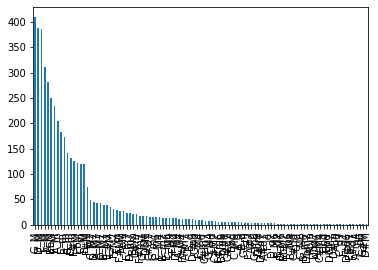

In [32]:
train_data["chord_label"].value_counts().plot.bar()                    # Plotting the bargraph of target column

### Seperate the feature variables and target variables from train and test dataset

In [33]:
X_train = train_data.drop('chord_label',axis=1)                       # Dropping the target column from the training dataset
y_train = train_data['chord_label']                                   # Storing the target column into the y variable

In [35]:
X_test = test_data.drop('chord_label',axis=1)                       # Dropping the target column from the testing dataset
y_test = test_data['chord_label']                                   # Storing the target column into the y variable

### Doing the labelencoding by labelencoding method

In [36]:
le = LabelEncoder()                             # Labelencoder method
le_y = le.fit_transform(y_train)                 # calling fit_transforming method and passing y lebel 

### Training the model on train dataset and building the training classifier

In [51]:
logreg = LogisticRegression(multi_class= 'auto')         
logreg.fit(X_train, y_train)                                 # Training the train dataset using the fit method

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### Predicting the values using predict method

In [52]:
pred_y = logreg.predict_proba(X_test)                            # Preditcting the values using the test dataset
pred_y

array([[3.73210446e-05, 1.84885682e-04, 3.95262143e-05, ...,
        2.77520234e-04, 1.43984341e-04, 1.81606910e-04],
       [8.79957268e-06, 6.68101834e-06, 2.49764436e-04, ...,
        1.50602179e-04, 1.20049283e-05, 5.50736516e-05],
       [6.10875357e-05, 8.46110899e-06, 3.80604016e-03, ...,
        3.41640487e-03, 5.92759002e-05, 4.84351691e-05],
       ...,
       [1.76883382e-05, 1.28775805e-04, 1.36011609e-03, ...,
        1.29687215e-02, 2.70966438e-04, 3.67340618e-04],
       [3.78244635e-05, 2.06435638e-04, 2.00533387e-03, ...,
        1.41762273e-03, 1.76787964e-04, 1.71318772e-04],
       [3.78244635e-05, 2.06435638e-04, 2.00533387e-03, ...,
        1.41762273e-03, 1.76787964e-04, 1.71318772e-04]])

In [53]:
  list(le.classes_)            # Printing the predicted calss

['A#d',
 'A#d7',
 'A_M',
 'A_M4',
 'A_M6',
 'A_M7',
 'A_d',
 'A_m',
 'A_m4',
 'A_m6',
 'A_m7',
 'AbM',
 'Abd',
 'Abm',
 'B_M',
 'B_M4',
 'B_M7',
 'B_d',
 'B_d7',
 'B_m',
 'B_m6',
 'B_m7',
 'BbM',
 'BbM7',
 'Bbd',
 'Bbm',
 'Bbm6',
 'C#M',
 'C#M4',
 'C#M7',
 'C#d',
 'C#d6',
 'C#d7',
 'C#m',
 'C#m7',
 'C_M',
 'C_M4',
 'C_M6',
 'C_M7',
 'C_d6',
 'C_d7',
 'C_m',
 'C_m6',
 'C_m7',
 'D#M',
 'D#d',
 'D#d6',
 'D#d7',
 'D#m',
 'D_M',
 'D_M4',
 'D_M6',
 'D_M7',
 'D_d7',
 'D_m',
 'D_m6',
 'D_m7',
 'DbM',
 'DbM7',
 'Dbd',
 'Dbd7',
 'Dbm',
 'Dbm7',
 'E_M',
 'E_M4',
 'E_M7',
 'E_d',
 'E_m',
 'E_m6',
 'E_m7',
 'EbM',
 'EbM7',
 'Ebd',
 'F#M',
 'F#M4',
 'F#M7',
 'F#d',
 'F#d7',
 'F#m',
 'F#m6',
 'F#m7',
 'F_M',
 'F_M4',
 'F_M6',
 'F_M7',
 'F_d',
 'F_d7',
 'F_m',
 'F_m6',
 'F_m7',
 'G#M',
 'G#d',
 'G#d7',
 'G#m',
 'G_M',
 'G_M4',
 'G_M6',
 'G_M7',
 'G_d',
 'G_m',
 'G_m6',
 'G_m7']

### Ouptut of classifed group through trained model

In [54]:
pred_prob = pd.DataFrame(pred_y,columns=list(le.classes_))         # Printing the predicted classified class with values
pred_prob

,A#d,A#d7,A_M,A_M4,A_M6,A_M7,A_d,A_m,A_m4,A_m6,...,G#d7,G#m,G_M,G_M4,G_M6,G_M7,G_d,G_m,G_m6,G_m7
0,0.000037,0.000185,0.000040,0.000055,0.000035,0.000919,0.000066,0.023989,0.000066,0.001939,...,0.000019,0.000009,0.004179,0.001734,0.000413,0.000200,0.000089,0.000278,0.000144,0.000182
1,0.000009,0.000007,0.000250,0.000036,0.000032,0.000119,0.000623,0.016186,0.000197,0.000393,...,0.000072,0.000007,0.000962,0.000056,0.000007,0.000616,0.000020,0.000151,0.000012,0.000055
2,0.000061,0.000008,0.003806,0.001277,0.000255,0.003304,0.000093,0.001374,0.000246,0.000117,...,0.000046,0.000039,0.004699,0.000205,0.000351,0.000035,0.000084,0.003416,0.000059,0.000048
3,0.000407,0.001120,0.000012,0.000065,0.000044,0.000258,0.000088,0.018908,0.000101,0.001620,...,0.000023,0.000012,0.001012,0.000915,0.000376,0.000077,0.000231,0.016072,0.001333,0.004411
4,0.000093,0.000036,0.000369,0.000097,0.000081,0.000426,0.000023,0.000540,0.000108,0.000379,...,0.000323,0.000391,0.054605,0.000120,0.000348,0.000422,0.000134,0.000528,0.000071,0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,0.000076,0.000043,0.000318,0.000016,0.000036,0.000058,0.007398,0.001306,0.000380,0.001302,...,0.000437,0.004922,0.000059,0.001161,0.000062,0.000033,0.000146,0.000049,0.000457,0.000014
1129,0.000558,0.000033,0.000022,0.000087,0.000008,0.000023,0.000017,0.000021,0.000069,0.000009,...,0.000215,0.000006,0.000201,0.000054,0.000062,0.001851,0.000045,0.020055,0.000258,0.005593
1130,0.000018,0.000129,0.001360,0.000155,0.000085,0.007699,0.001974,0.352663,0.000776,0.000490,...,0.000034,0.000031,0.157362,0.005121,0.000144,0.000282,0.000527,0.012969,0.000271,0.000367
1131,0.000038,0.000206,0.002005,0.001148,0.000192,0.010160,0.000506,0.515075,0.000284,0.001911,...,0.000025,0.000009,0.010375,0.001721,0.000375,0.000109,0.000083,0.001418,0.000177,0.000171


### Building the 2nd model using the KNN classifier method

In [57]:
knc = KNeighborsClassifier(n_neighbors = 25, weights = 'distance')     # Calling the method
knc.fit(X_train, y_train)                                             # Traing the model using fit method
yhat = knc.predict(X_test)                                            # Predicting the value
yhat

array(['C_M', 'F_M', 'D_M', ..., 'A_m', 'A_m', 'A_m'], dtype=object)

In [46]:
result = confusion_matrix(y_test, yhat)                       # plotting the confusin matrix as tabular form
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 30  0]
 [ 0  0  0 ...  0  2  1]]


### Checking the model accuracy

In [47]:
result1 = classification_report(y_test, yhat)            # Checking the model accuracy with full classified report
print("Classification Report:")
print(result1)

Classification Report:
              precision    recall  f1-score   support

         A#d       0.00      0.00      0.00         2
        A#d7       0.00      0.00      0.00         1
         A_M       0.73      0.86      0.79        70
        A_M4       0.43      0.60      0.50         5
        A_M7       0.00      0.00      0.00        13
         A_m       0.61      0.87      0.72        54
        A_m4       0.00      0.00      0.00         1
        A_m6       1.00      0.50      0.67         2
        A_m7       0.00      0.00      0.00         1
         AbM       0.91      0.91      0.91        11
         B_M       0.69      0.75      0.72        24
        B_M4       0.00      0.00      0.00         1
        B_M7       0.00      0.00      0.00         8
         B_d       0.50      0.14      0.22         7
        B_d7       0.00      0.00      0.00         6
         B_m       0.51      0.76      0.61        45
        B_m7       0.00      0.00      0.00         6
    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1